In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
sample_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [24]:
test_with_prices = pd.merge(left=test, right=sample_submission, on='Id')
test_with_prices.fillna(method='ffill', inplace=True)
data.fillna(method='ffill', inplace=True)

Text(0.5, 1.0, 'SalePrice vs Bedrooms')

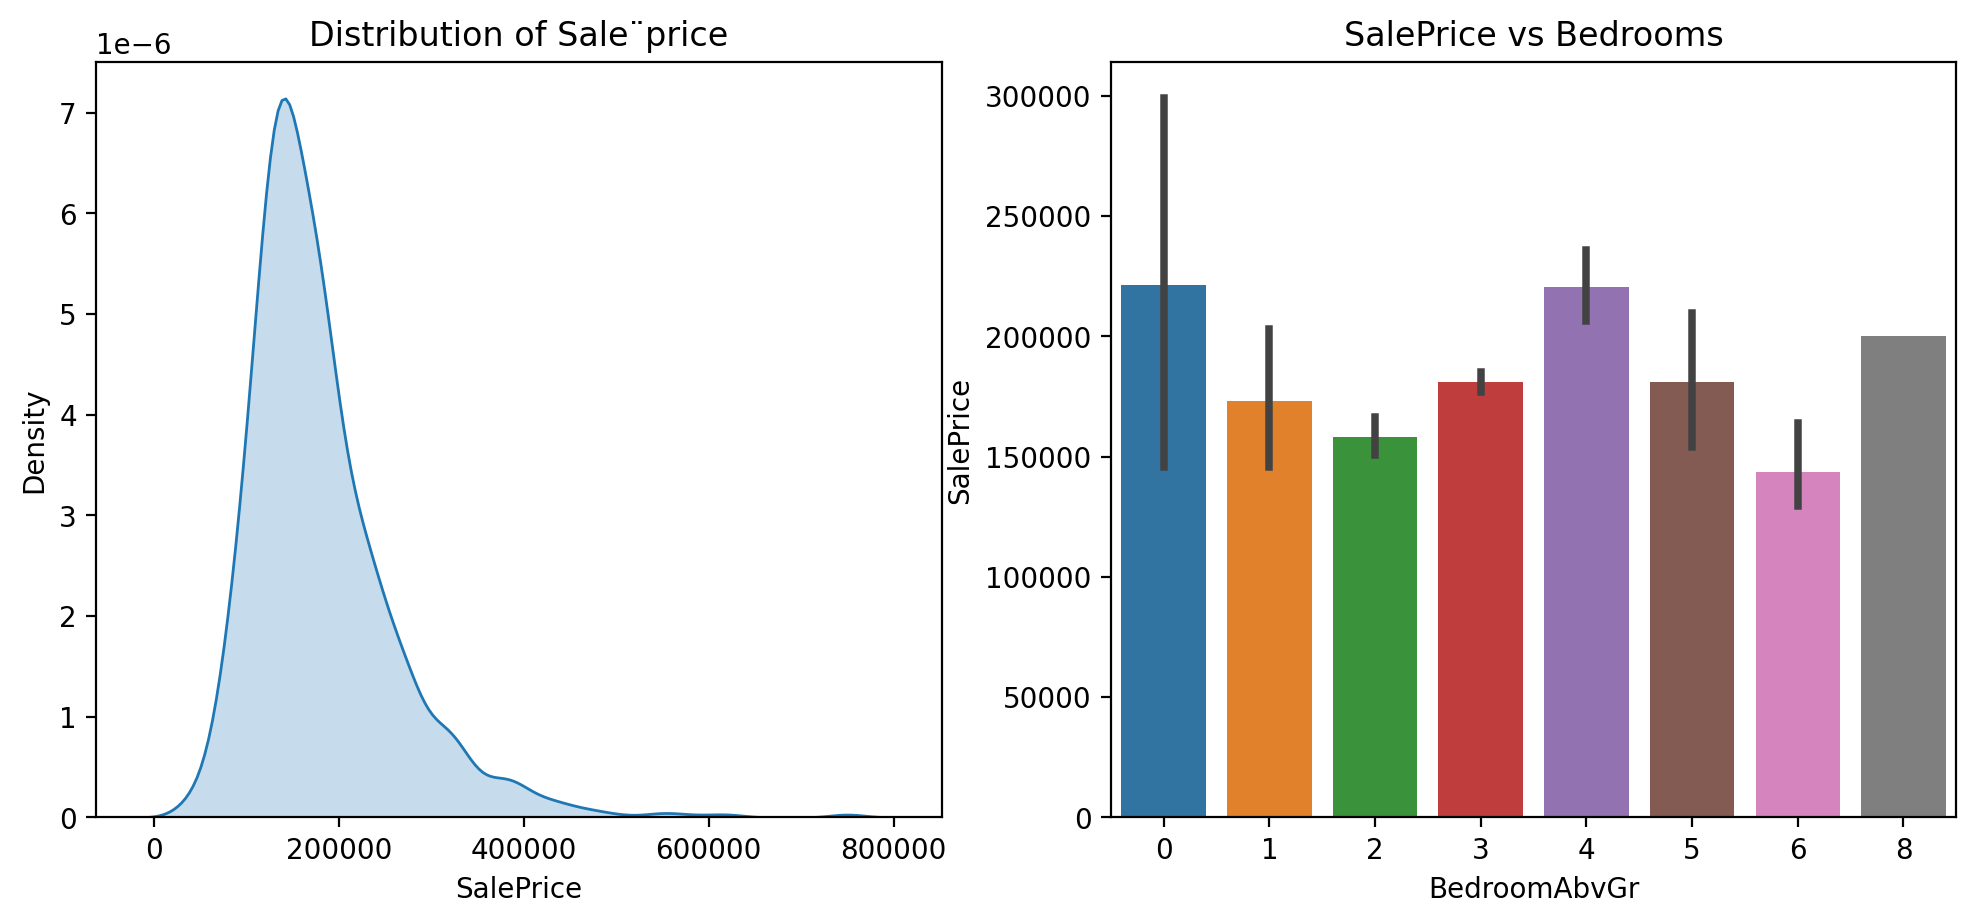

In [78]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=200)
sns.kdeplot(ax=axes[0], x="SalePrice", data=data, fill=True)
axes[0].set_title("Distribution of Sale¨price")
sns.barplot(ax=axes[1], x="BedroomAbvGr", y="SalePrice", data=data)
axes[1].set_title("SalePrice vs Bedrooms")

In [38]:
features = ['LotArea', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond',
           '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'MSSubClass', 'LotFrontage',
           'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF']
train_X = data[features]
train_y = data.SalePrice
val_X = test_with_prices[features]
val_y = test_with_prices.SalePrice

model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)

rf_val_predictions = model.predict(val_X)

model_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(model_mae))




Validation MAE for Random Forest Model: 53033.03229701866
